In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = pd.read_csv("/content/survey lung cancer.csv")

In [6]:
# Data Overview
print(data.head())
print(data.info())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [7]:
# Encode categorical features
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

In [8]:
# Splitting features and target
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

In [9]:
# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Build the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.967741935483871
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



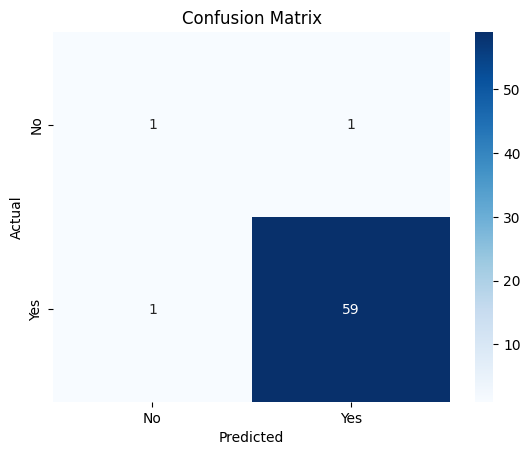

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

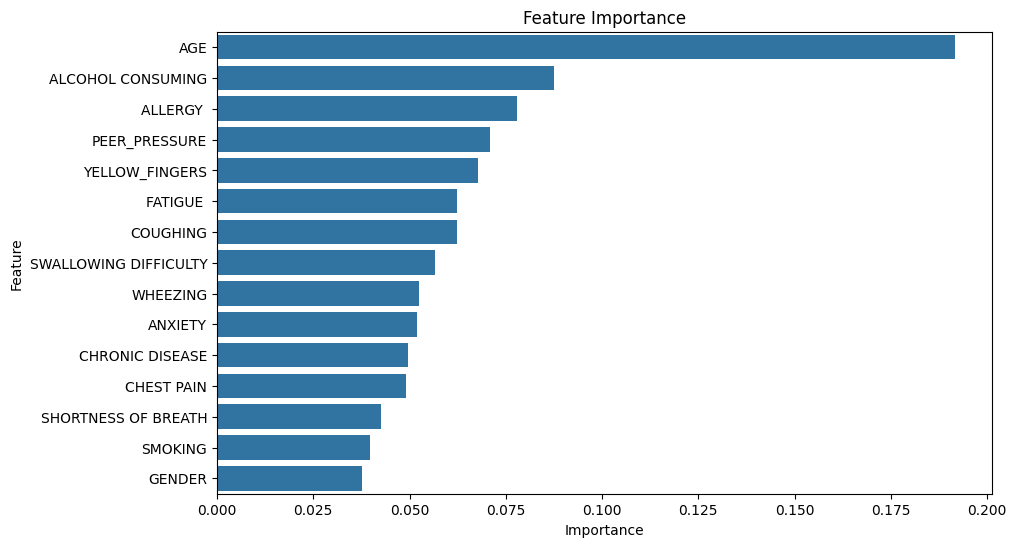

In [16]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [17]:
# Test with a sample input
sample_input = np.array([[1, 55, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]])
sample_scaled = scaler.transform(sample_input)
sample_prediction = model.predict(sample_scaled)
print("\nSample Test Prediction:", 'Lung Cancer' if sample_prediction[0] == 1 else 'No Lung Cancer')


Sample Test Prediction: Lung Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Save the model for future use
import joblib
joblib.dump(model, 'lung_cancer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel and scaler saved for future use.")


Model and scaler saved for future use.
